<a href="https://colab.research.google.com/github/srizvi29/Sara_Rizvi_ML_repo/blob/main/HWK4_Rizvi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Sara Rizvi**

**RIN: 662088215**

**Homework 4**

In [1]:
#Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Question 1

**Part a**

In [2]:
# Import Cifar-10 Dataset
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

# Load dataset
(X_train, y_train), (X_test, y_test)  = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
print('X_train Shape:',X_train.shape)
print('y_train Shape:',y_train.shape)
print('X_test Shape:',X_test.shape)
print('y_test Shape:',y_test.shape)

X_train Shape: (50000, 32, 32, 3)
y_train Shape: (50000, 1)
X_test Shape: (10000, 32, 32, 3)
y_test Shape: (10000, 1)


In [4]:
# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                  test_size=0.3,
                                                  random_state=42)

In [5]:
print('X_train Shape:',X_train.shape)
print('y_train Shape:',y_train.shape)
print('X_test Shape:',X_test.shape)
print('y_test Shape:',y_test.shape)

X_train Shape: (35000, 32, 32, 3)
y_train Shape: (35000, 1)
X_test Shape: (15000, 32, 32, 3)
y_test Shape: (15000, 1)


In [6]:
# Visualize data for each category
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Find one image per class
unique_classes = np.unique(y_train)
num_classes = len(unique_classes)
images_per_class = [] # Collects images in a list

# Go through each index and determine class for each
for class_index in unique_classes:
  images_per_class.append(np.where(y_train == class_index)[0][0]) # Append image to lisr

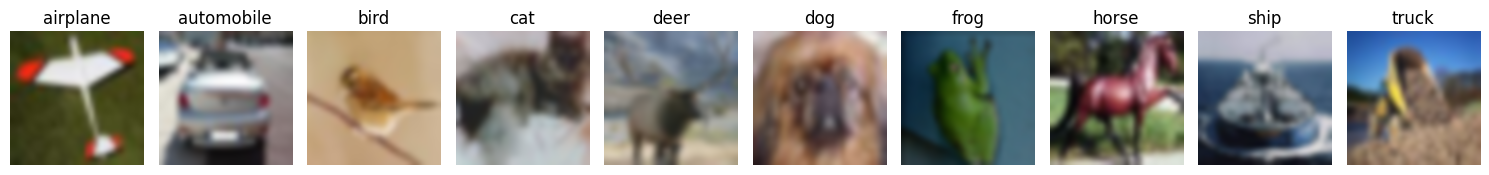

In [7]:
# Plot one image from each class
fig, axes = plt.subplots(1, num_classes, figsize=(15,5))

# Go through each image and classify in a category
for i, index in enumerate(images_per_class):
  image = X_train[index]
  label = y_train[index]
  axes[i].imshow(image,interpolation='bicubic')
  axes[i].set_title(class_names[label[0]])
  axes[i].axis('off')

plt.tight_layout()
plt.show()

**Part b**

In [9]:
# Import libraries
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import accuracy_score, mean_squared_error

In [10]:
# Create model function
def create_model(hidden_layers, units_per_layer, learning_rate):
  model = Sequential()
  model.add(Flatten(input_shape=(32,32,3))) # Flatten input image

  # Create hidden layers
  for _ in range(hidden_layers):
    model.add(Dense(units=units_per_layer, activation='relu'))
  # Output layer
  model.add(Dense(units=10, activation='softmax'))

  # Compile model
  optimizer = Adam(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [11]:
# Define hyperparameter grid of choice
hidden_layers = [2,3,4]
units_per_layer = [32,64,128]
learning_rates = [0.0001, 0.001]
batch_sizes = [32,64,128]

# Store results
best_accuracy = 0
best_params = {}

# One-hot encode y_train and y_test data --> needed for model
y_train_encoded = to_categorical(y_train, num_classes=10) # Change here
y_test_encoded = to_categorical(y_test, num_classes=10) # Change here

# Manually do GridSearch with Nested loops
for hidden_layer in hidden_layers:
    for unit_layer in units_per_layer:
      for learning_rate in learning_rates:
          for batch_size in batch_sizes:
            # Print the current parameters as it runs
            print(f"Hidden Layers: {hidden_layer}, Units per Layer: {unit_layer}, Learning Rate: {learning_rate}, Batch Size: {batch_size}")

            # Build Model
            model = create_model(hidden_layer, unit_layer, learning_rate)

            # Train model
            history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=batch_size, validation_data=(X_test,y_test_encoded), verbose=0) # Change here

            # Evaluate model
            valid_accuracy = history.history['val_accuracy'][-1]
            print(f"Validation Accuracy: {valid_accuracy}")

            # Track best parameters
            if valid_accuracy > best_accuracy:
                best_accuracy = valid_accuracy
                best_params = {'hidden_layers': hidden_layer, 'units_per_layer': unit_layer, 'learning_rate': learning_rate, 'batch_size': batch_size}

Hidden Layers: 2, Units per Layer: 32, Learning Rate: 0.0001, Batch Size: 32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.0957999974489212
Hidden Layers: 2, Units per Layer: 32, Learning Rate: 0.0001, Batch Size: 64
Validation Accuracy: 0.09573332965373993
Hidden Layers: 2, Units per Layer: 32, Learning Rate: 0.0001, Batch Size: 128
Validation Accuracy: 0.09600000083446503
Hidden Layers: 2, Units per Layer: 32, Learning Rate: 0.001, Batch Size: 32
Validation Accuracy: 0.0957999974489212
Hidden Layers: 2, Units per Layer: 32, Learning Rate: 0.001, Batch Size: 64
Validation Accuracy: 0.0976666659116745
Hidden Layers: 2, Units per Layer: 32, Learning Rate: 0.001, Batch Size: 128
Validation Accuracy: 0.0957999974489212
Hidden Layers: 2, Units per Layer: 64, Learning Rate: 0.0001, Batch Size: 32
Validation Accuracy: 0.318533331155777
Hidden Layers: 2, Units per Layer: 64, Learning Rate: 0.0001, Batch Size: 64
Validation Accuracy: 0.09573332965373993
Hidden Layers: 2, Units per Layer: 64, Learning Rate: 0.0001, Batch Size: 128
Validation Accuracy: 0.24086666107177734
Hidden Layers: 2, Uni

In [12]:
# Print best parameter and Accuracy
print("Best Parameters:", best_params)
print("Best Validation Accuracy:", best_accuracy)

#Best Parameters: {'hidden_layers': 4, 'units_per_layer': 128, 'learning_rate': 0.0001, 'batch_size': 64}

Best Parameters: {'hidden_layers': 4, 'units_per_layer': 128, 'learning_rate': 0.0001, 'batch_size': 64}
Best Validation Accuracy: 0.36826667189598083


In [14]:
# Initialize and train on model with the best parameters
best_model = create_model(best_params['hidden_layers'], best_params['units_per_layer'], best_params['learning_rate'])

# Apply one-hot encoding to y_train and y_test
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

history = best_model.fit(X_train, y_train_encoded, epochs=200, batch_size=best_params['batch_size'], validation_data=(X_test, y_test_encoded), verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
547/547 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1656 - loss: 8.2734 - val_accuracy: 0.2208 - val_loss: 2.3693
Epoch 2/200
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2284 - loss: 2.2560 - val_accuracy: 0.2359 - val_loss: 2.2126
Epoch 3/200
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2641 - loss: 2.0718 - val_accuracy: 0.2553 - val_loss: 2.0970
Epoch 4/200
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2893 - loss: 1.9940 - val_accuracy: 0.3126 - val_loss: 1.9391
Epoch 5/200
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3140 - loss: 1.9207 - val_accuracy: 0.3239 - val_loss: 1.8990
Epoch 6/200
547/547 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3298 - loss: 1.8759 - val_accuracy: 0.3223 - val_loss: 1.8898
Epoch 7/200
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3445 - loss: 1.8271 - val_accuracy: 0.3513 - val_loss: 1.8252
Epoch 8/200
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3499 - loss: 1.8293 - val_accu

**Part c**

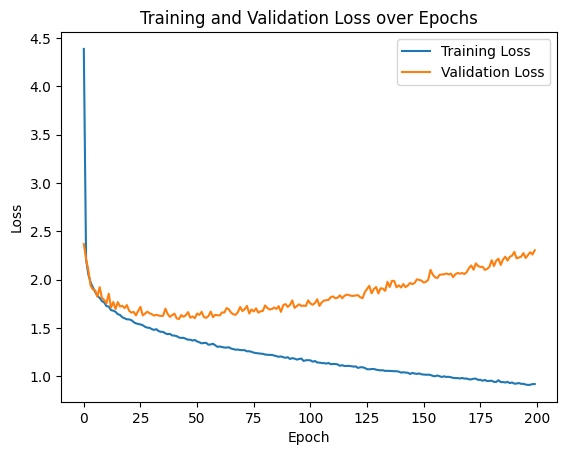

In [15]:
# Plot Training and Validation Losses
# Plot training and validation losses over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

**Part d**

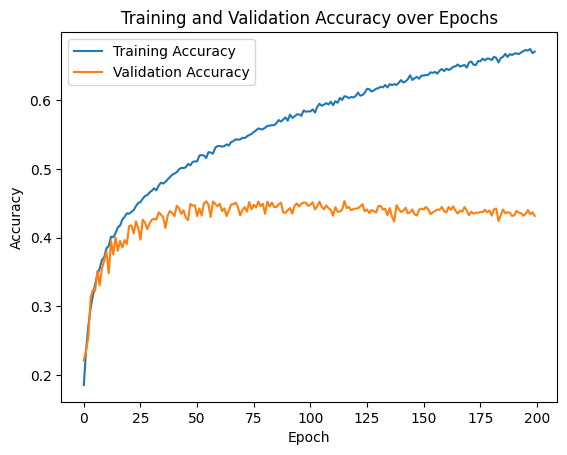

In [16]:
# Plot Training and Validation Accuracies
# Plot training and validation accuracies over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

# Question 2

**Part a**

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Import NASA airfoil self-noise dataset
# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat"

# Put data in data frame
df = pd.read_csv(url, sep='\t', header=None)

# Assign column names
df.columns = ['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity', 'Suction side displacement thickness', 'Scaled sound pressure level']


In [3]:
# Access data
X = df[['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity', 'Suction side displacement thickness']]
y = df['Scaled sound pressure level']

# Print info
print(X.head())
print(y.head())

   Frequency  Angle of attack  Chord length  Free-stream velocity  \
0        800              0.0        0.3048                  71.3   
1       1000              0.0        0.3048                  71.3   
2       1250              0.0        0.3048                  71.3   
3       1600              0.0        0.3048                  71.3   
4       2000              0.0        0.3048                  71.3   

   Suction side displacement thickness  
0                             0.002663  
1                             0.002663  
2                             0.002663  
3                             0.002663  
4                             0.002663  
0    126.201
1    125.201
2    125.951
3    127.591
4    127.461
Name: Scaled sound pressure level, dtype: float64


In [4]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

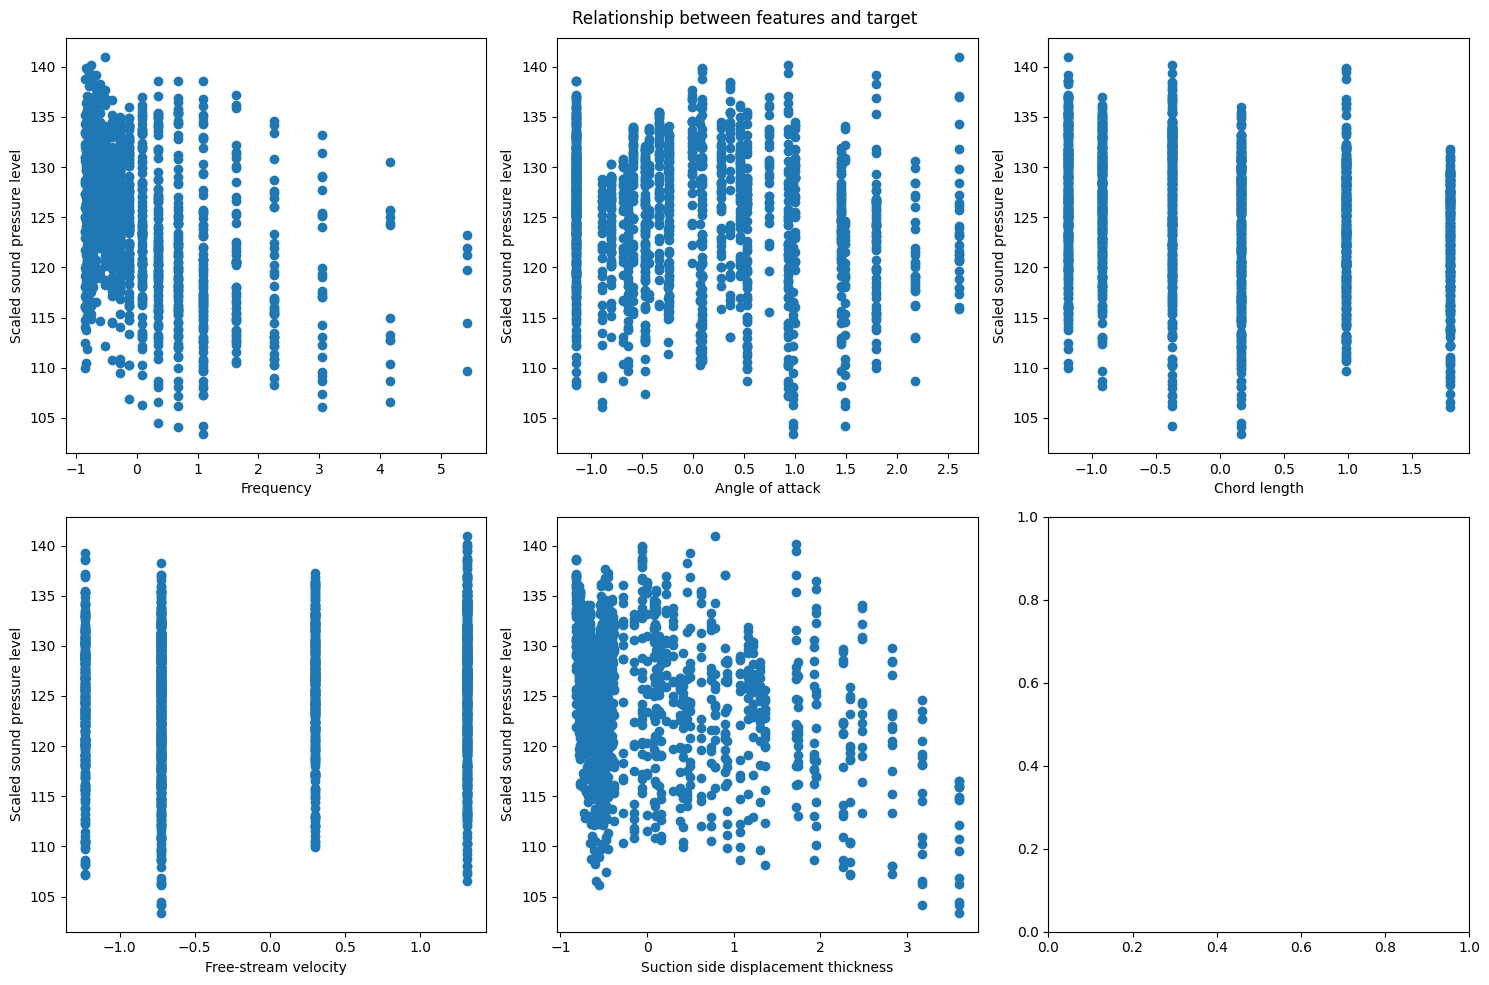

In [7]:
# Visualize data
# See relationships between the features and target
fig, axs = plt.subplots(2,3, figsize=(15,10))
fig.suptitle('Relationship between features and target')

# Organize features
features = df[['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity', 'Suction side displacement thickness']].columns
for i, feature in enumerate(features):
  row = i // 3
  col = i % 3
  axs[row, col].scatter(X[:,i], y)
  axs[row, col].set_xlabel(features[i])
  axs[row, col].set_ylabel('Scaled sound pressure level')

plt.tight_layout()
plt.show()

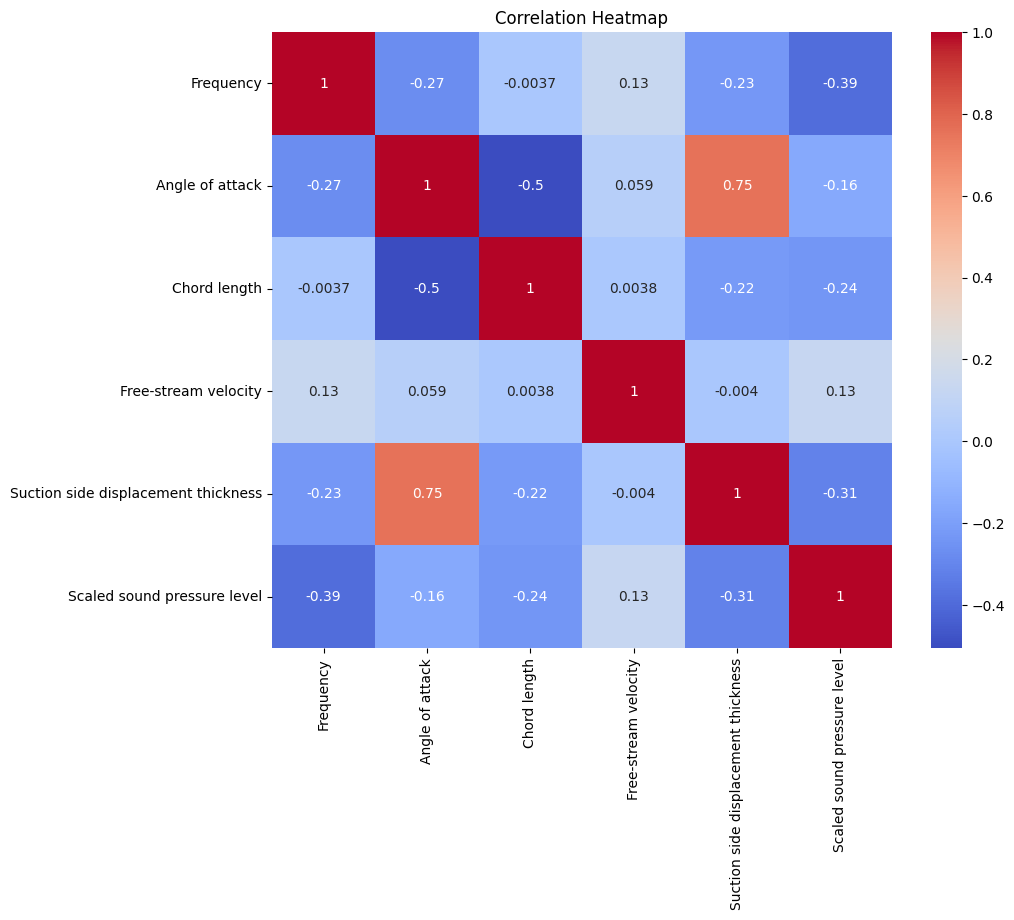

In [8]:
# Heatmap for visulaization (positive correlation = red, neg correlation  = blue)
import seaborn as sns
plt.figure(figsize=(10,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

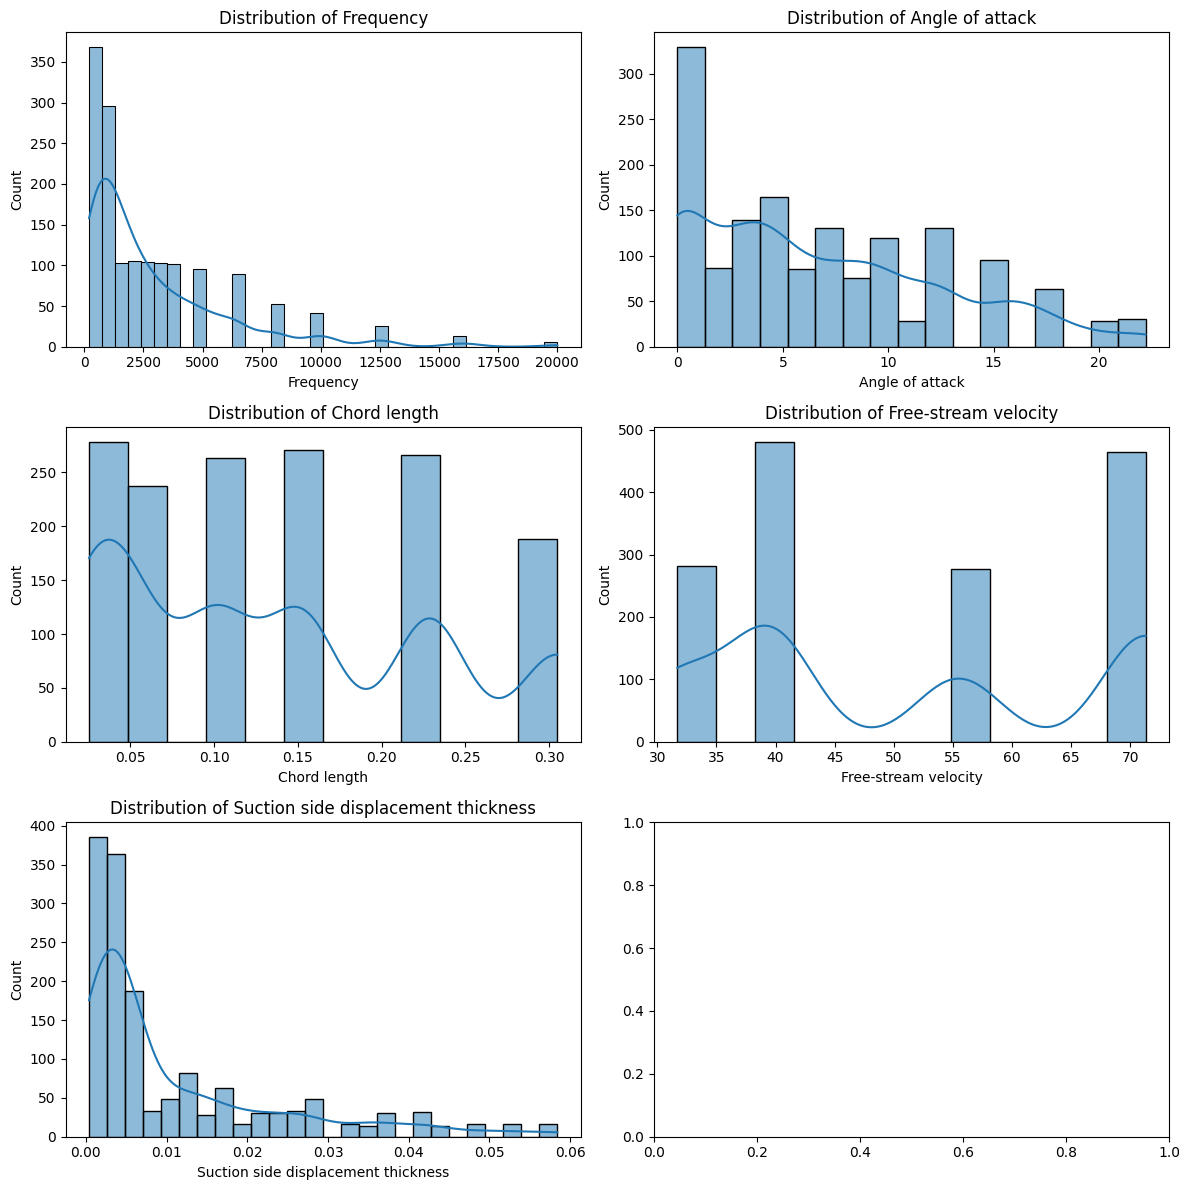

In [10]:
# Plots to visualize distributions of each feature
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
for i, col in enumerate(df.columns[:-1]):
    sns.histplot(df[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Part b**

In [11]:
# Import libraries
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [10]:
# Define hyperparameter grid
hidden_layers = [2,3,4]
units_per_layer = [32,64,128]
learning_rates = [0.001,0.01,0.1]
batch_sizes = [32,64,128]

# Store results
best_params = {}
best_mse = float('inf') # Initialize with large value

# Manually do GridSearch with Nested loops
for hidden_layer in hidden_layers:
    for unit_layer in units_per_layer:
      for learning_rate in learning_rates:
          for batch_size in batch_sizes:

              # Build Model
              model = Sequential()
              # Hidden layers
              for i in range(hidden_layer):
                  model.add(Dense(units=unit_layer, activation='relu'))
              model.add(Dense(units=1, activation='linear')) # output - linear allows model to predict full range of values

              # Compile Model
              optimizer = Adam(learning_rate=learning_rate) # Adam optimizer used
              model.compile(optimizer=optimizer, loss='mean_squared_error')

              # Train model
              model.fit(X_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2, verbose=0)

              # Evaluate model
              y_pred = model.predict(X_test)
              mse = mean_squared_error(y_test, y_pred)

              # Update best parameter based on current model
              if mse < best_mse:
                  best_mse = mse
                  best_params['hidden_layers'] = hidden_layer
                  best_params['units_per_layer'] = unit_layer
                  best_params['learning_rate'] = learning_rate
                  #best_params['activation'] = activation
                  best_params['batch_size'] = batch_size
                  #best_params['epochs'] = epoch

# Print best parameter and mse
print("Best Parameters:", best_params)
print("Best MSE:", best_mse)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
15/15 ━━━━━━━

In [11]:
# Print best parameter and mse
print("Best Parameters:", best_params)
print("Best Validation Accuracy:", mse)

Best Parameters: {'hidden_layers': 3, 'units_per_layer': 64, 'learning_rate': 0.1, 'batch_size': 64}
Best Validation Accuracy: 47.63303474224277


In [12]:
# Build the neural network model with specified parameters
model = Sequential()

# Add input layer and hidden layers (3 hidden layers as specified)
for _ in range(3):
    model.add(Dense(units=64, activation='relu'))  # hidden layers
model.add(Dense(units=1, activation='linear'))  # output layer (regression)

# Compile the model with learning rate of 0.1
model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error')

# Train the model with batch_size of 64 for 100 epochs
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 11255.4775 - val_loss: 2984.2346
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1887.6382 - val_loss: 986.9980
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1098.6160 - val_loss: 821.4855
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 625.0717 - val_loss: 486.9370
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 404.3809 - val_loss: 251.9654
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 223.9724 - val_loss: 145.1653
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 130.7791 - val_loss: 104.2570
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 76.7852 - val_loss: 72.5618
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 45.4658 - val_loss: 41.4872
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 31.5188 - val_loss: 30.6670
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 29.8285 - val_loss: 39.8683
Epoch 12/100
14/14 ━

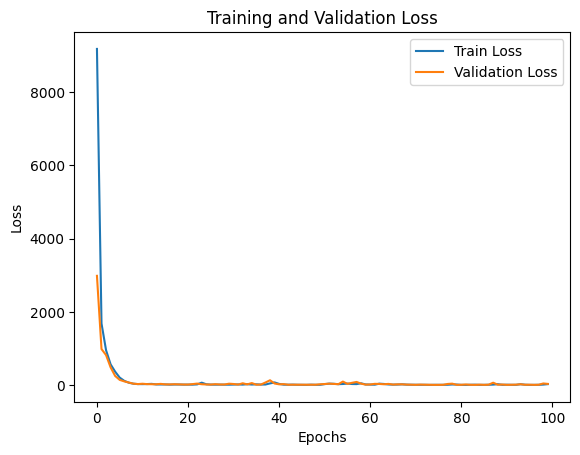

In [13]:
# Plot training history (loss)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Part c**

In [17]:
# Calculate coeff of determination
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('R^2 Score:',r2)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
R^2 Score: 0.41000702824698676
